In [9]:
from xgboost import XGBClassifier

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
import numpy as np

In [50]:
x = np.array([[1,2,3,4,5,6],[2,3,4,5,6,7],[8,5,2,6,9,9],[6,5,6,9,8,9],[5,6,7,8,9,9],[13,44,52,36,26,18],[12,53,83,55,26,37],[43,24,36,46,78,19]])
y = np.array([3,2,2,2,3,3,3,3])

In [51]:
model = XGBClassifier()
model.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [52]:
model.predict([[1,2,3,4,5,6],[2,3,4,5,6,7],[8,5,2,6,9,9],[6,5,6,9,8,9],[5,6,7,8,9,9],[13,44,52,36,26,18],[12,53,83,55,26,37],[43,24,36,46,78,19]])

array([3, 3, 3, 3, 3, 3, 3, 3])

In [53]:
from xgboost import plot_importance
from matplotlib import pyplot


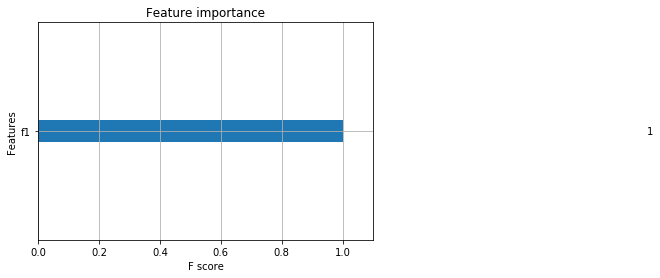

In [54]:
plot_importance(model)
pyplot.show()

In [55]:
from sklearn.datasets import load_iris  

In [57]:
iris = load_iris()


In [82]:
DATA_t = iris.target[:,np.newaxis]
DATA_t

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [84]:
DATA = np.hstack((iris.data,DATA_t))

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = DATA[:,0:4]
Y = DATA[:,4]
seed = 7
test_size = 0.01

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=test_size,random_state = seed)


model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [101]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)

In [102]:
accuracy

1.0

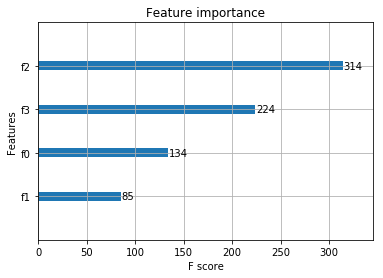

In [62]:
plot_importance(model)
pyplot.show()

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
X = DATA[:,0:4]
Y = DATA[:,4]

model = XGBClassifier()
#learning_rate = [0.0001,0.001,0.01,0.1,0.2,0.3]
n_estimators = list(range(40,60))
#param_grid = dict(learning_rate = learning_rate)
param_grid = dict(n_estimators = n_estimators)
kfold = StratifiedKFold(n_splits = 10,shuffle=True,random_state = 7)
grid_search = GridSearchCV(model, param_grid , scoring='neg_log_loss', n_jobs = -1, cv = kfold)
grid_result = grid_search.fit(X,Y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean,param in zip(means,params):
    print("%f with: %r"%(mean,param))

Best: -0.153682 using {'n_estimators': 46}
-0.154232 with: {'n_estimators': 40}
-0.153836 with: {'n_estimators': 41}
-0.154392 with: {'n_estimators': 42}
-0.154105 with: {'n_estimators': 43}
-0.154268 with: {'n_estimators': 44}
-0.154391 with: {'n_estimators': 45}
-0.153682 with: {'n_estimators': 46}
-0.154503 with: {'n_estimators': 47}
-0.155079 with: {'n_estimators': 48}
-0.156306 with: {'n_estimators': 49}
-0.157184 with: {'n_estimators': 50}
-0.157979 with: {'n_estimators': 51}
-0.158763 with: {'n_estimators': 52}
-0.159692 with: {'n_estimators': 53}
-0.159956 with: {'n_estimators': 54}
-0.161052 with: {'n_estimators': 55}
-0.161909 with: {'n_estimators': 56}
-0.162620 with: {'n_estimators': 57}
-0.163682 with: {'n_estimators': 58}
-0.164377 with: {'n_estimators': 59}
